In [38]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [39]:
import os


#print(os.getcwd())
os.chdir('/content/gdrive/My Drive/188/Project Stuff/Code')
!ls

 Collaborative.ipynb	      MoviesOnStreamingPlatforms_updated.csv
'Content Based Model.ipynb'   ogMoviesOnStreamingPlatforms_updated.gsheet
 data_visualization.ipynb     ratings.csv
 movies.csv		      test.ipynb


In [40]:
import pandas as pd

ds = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
ds = ds.iloc[:, 1:]    #remove unnamed index column
ds.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
1,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
2,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
3,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
4,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0


In [41]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4565 non-null   object 
 1   Year             4565 non-null   int64  
 2   Age              3132 non-null   object 
 3   IMDb             4563 non-null   float64
 4   Rotten Tomatoes  4565 non-null   object 
 5   Netflix          4565 non-null   int64  
 6   Hulu             4565 non-null   int64  
 7   Prime Video      4565 non-null   int64  
 8   Disney+          4565 non-null   int64  
 9   Type             4565 non-null   int64  
 10  Directors        4471 non-null   object 
 11  Genres           4560 non-null   object 
 12  Country          4546 non-null   object 
 13  Language         4518 non-null   object 
 14  Runtime          4532 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 535.1+ KB


In [42]:
ds.drop(['Age'], axis =1, inplace=True)
ds.dropna(subset=['IMDb', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'], inplace = True)
ds.reset_index(inplace=True, drop=True)
ds.Year = ds.Year.astype("object")
ds['Rotten Tomatoes'] = ds['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4420 non-null   object 
 1   Year             4420 non-null   object 
 2   IMDb             4420 non-null   float64
 3   Rotten Tomatoes  4420 non-null   float64
 4   Netflix          4420 non-null   int64  
 5   Hulu             4420 non-null   int64  
 6   Prime Video      4420 non-null   int64  
 7   Disney+          4420 non-null   int64  
 8   Type             4420 non-null   int64  
 9   Directors        4420 non-null   object 
 10  Genres           4420 non-null   object 
 11  Country          4420 non-null   object 
 12  Language         4420 non-null   object 
 13  Runtime          4420 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 483.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


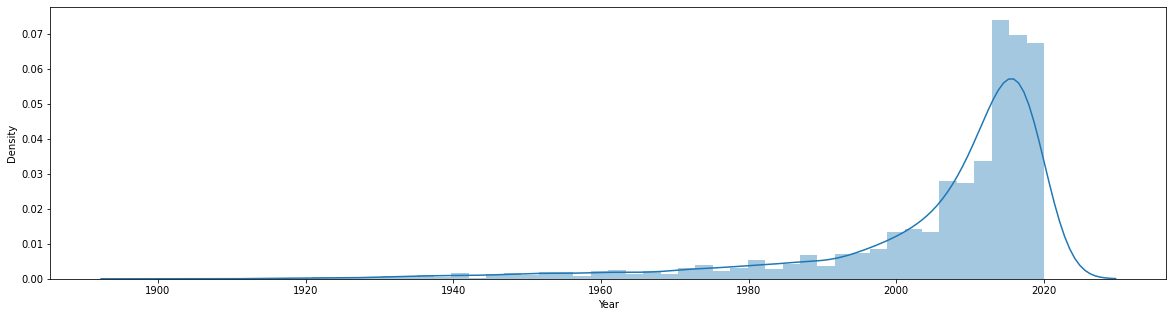

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 5))
sns.distplot(ds['Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


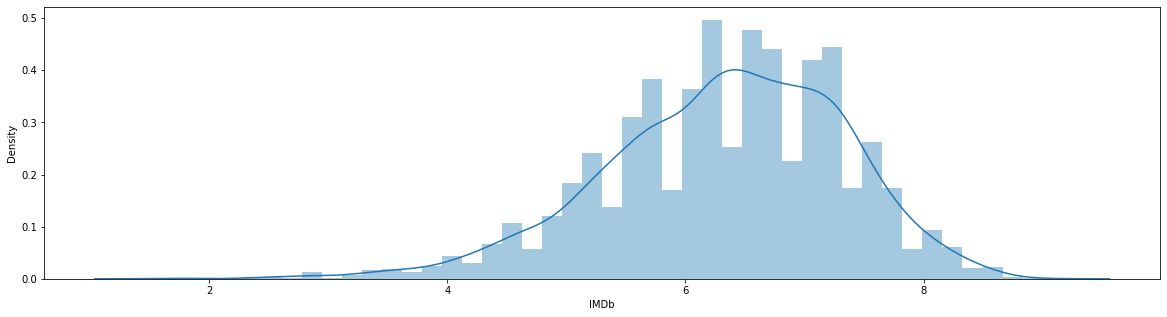

In [44]:
plt.figure(figsize = (20,5))
sns.distplot(ds['IMDb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


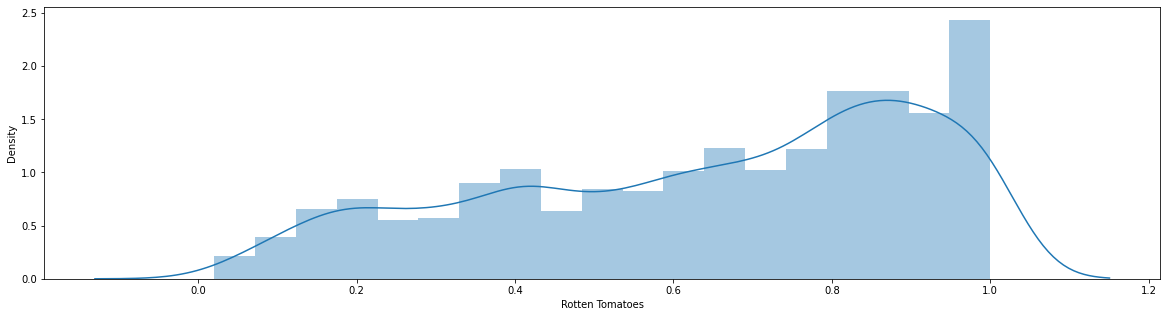

In [45]:
plt.figure(figsize = (20,5))
sns.distplot(ds['Rotten Tomatoes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


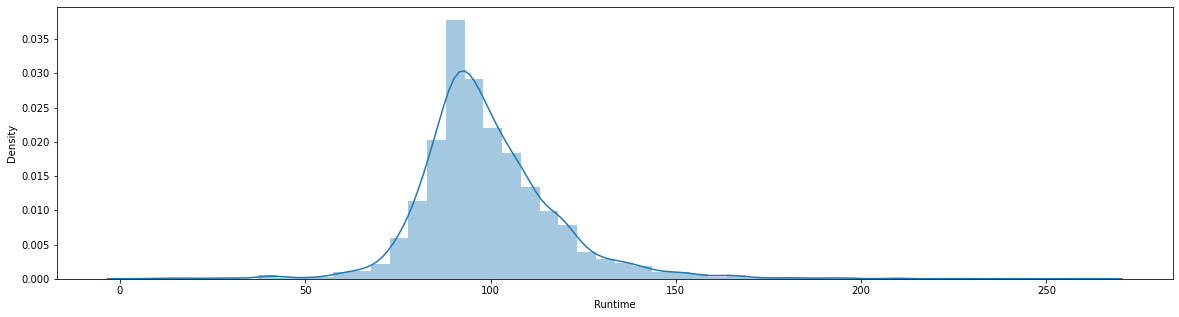

In [46]:
plt.figure(figsize = (20,5))
sns.distplot(ds['Runtime'])
plt.show()

In [47]:
def movie_count(platform, count=False):
    if count==False:
        print('Platform {} Count : {}'.format(platform, ds[platform].sum()))
        
    else:
        return ds[platform].sum()

In [48]:
movie_count('Netflix')
movie_count('Prime Video')
movie_count('Disney+')
movie_count('Hulu')

Platform Netflix Count : 1192
Platform Prime Video Count : 2615
Platform Disney+ Count : 341
Platform Hulu Count : 564


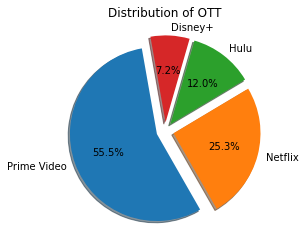

In [49]:
platform = 'Prime Video', 'Netflix', 'Hulu', 'Disney+'
s = [movie_count('Prime Video', count = True),
     movie_count('Netflix', count = True),
     movie_count('Hulu', count = True),
     movie_count('Disney+', count = True),
    ]

explode= (0.1, 0.1, 0.1, 0.1)

#plot
fig1, ax1 = plt.subplots()
ax1.pie(s, 
       labels = platform,
       autopct = '%1.1f%%',
       explode = explode,
       shadow = True,
       startangle=100)

ax1.axis = ('equal')
plt.title('Distribution of OTT')
plt.show()

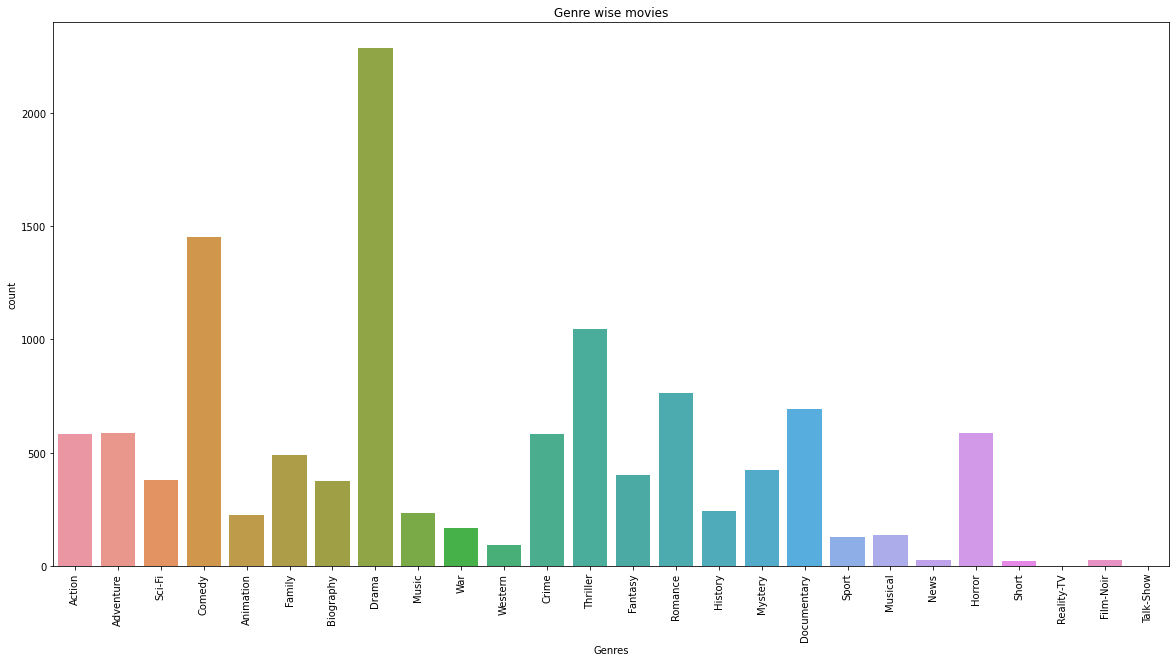

In [50]:
g = ds['Genres'].str.split(',').apply(pd.Series,1).stack()

g.index = g.index.droplevel(-1)

#assign name
g.name = 'Genres'

#delete column
del ds['Genres']

#join new column
ds_genres = ds.join(g)

plt.figure(figsize=(20,10))
sns.countplot(x='Genres', data = ds_genres)
plt.xticks(rotation=90)
plt.title("Genre wise movies")
plt.show()

In [51]:
ds_genres.head()

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Country,Language,Runtime,Genres
0,Avengers: Infinity War,2018,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo",United States,English,149.0,Action
0,Avengers: Infinity War,2018,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo",United States,English,149.0,Adventure
0,Avengers: Infinity War,2018,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo",United States,English,149.0,Sci-Fi
1,Back to the Future,1985,8.5,0.96,1,0,0,0,0,Robert Zemeckis,United States,English,116.0,Adventure
1,Back to the Future,1985,8.5,0.96,1,0,0,0,0,Robert Zemeckis,United States,English,116.0,Comedy


In [52]:
c = ds['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)

#assign name
c.name = 'Country'

#delete column
del ds['Country']

ds_country = ds.join(c)

ds_country.head()

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Language,Runtime,Country
0,Avengers: Infinity War,2018,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo",English,149.0,United States
1,Back to the Future,1985,8.5,0.96,1,0,0,0,0,Robert Zemeckis,English,116.0,United States
2,Spider-Man: Into the Spider-Verse,2018,8.4,0.97,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","English,Spanish",117.0,United States
3,The Pianist,2002,8.5,0.95,1,0,1,0,0,Roman Polanski,"English,German,Russian",150.0,United Kingdom
3,The Pianist,2002,8.5,0.95,1,0,1,0,0,Roman Polanski,"English,German,Russian",150.0,France


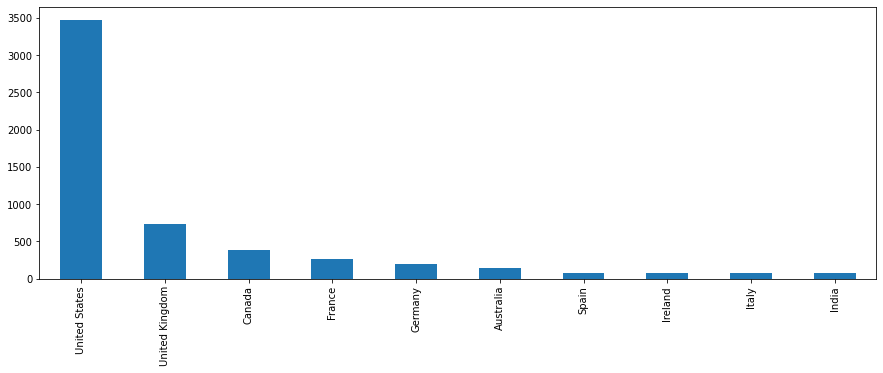

In [53]:
ds_country['Country'].value_counts()[:10].plot(kind="bar", figsize=(15,5))
plt.show()

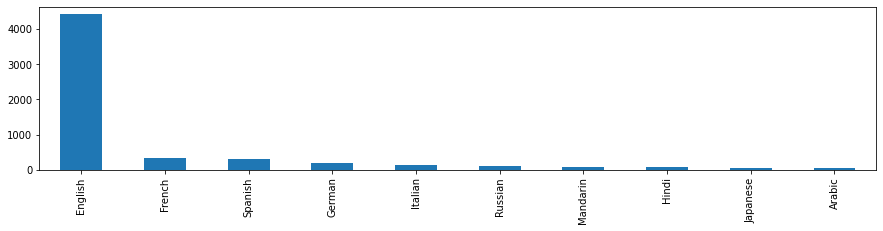

In [54]:
l = ds['Language'].str.split(',').apply(pd.Series,1).stack()

l.index = l.index.droplevel(-1)

l.name = "Language"

del ds['Language']

ds_language = ds.join(l)

ds_language['Language'].value_counts()[:10].plot(kind = 'bar', figsize =(15,3))
plt.show()

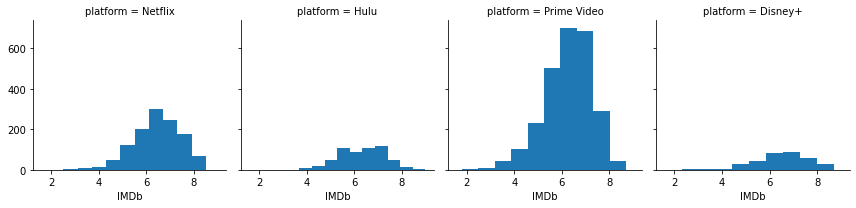

In [55]:
ds_Imdb = pd.melt(ds, id_vars = ['Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Type', 'Runtime'], var_name = 'platform')

ds_Imdb = ds_Imdb[ds_Imdb.value==1]
ds_Imdb.drop(columns=["value"], axis=1, inplace=True)

g = sns.FacetGrid(ds_Imdb, col="platform")
g.map(plt.hist, "IMDb")
plt.show()

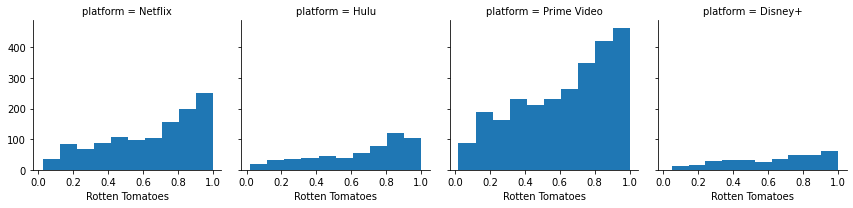

In [56]:
ds_RT = pd.melt(ds, id_vars = ['Title', 'Year', 'IMDb', 'Rotten Tomatoes', 'Type', 'Runtime'], var_name = 'platform')

ds_RT = ds_RT[ds_RT.value==1]
ds_RT.drop(columns=["value"], axis=1, inplace=True)

g = sns.FacetGrid(ds_RT, col="platform")
g.map(plt.hist, "Rotten Tomatoes")
plt.show()

In [58]:
ds = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
ds=ds.iloc[:,1:]

# melting platform columns to create visualization
ds2 = pd.melt(ds, id_vars=["Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"], var_name="platform")
ds2 = ds2[ds2.value==1]
ds2.drop(columns=["value"],axis=1,inplace=True)

ds2.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Type,Runtime,platform
0,Avengers: Infinity War,2018,13+,8.5,84%,0,149.0,Netflix
1,Back to the Future,1985,7+,8.5,96%,0,116.0,Netflix
2,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,0,117.0,Netflix
3,The Pianist,2002,18+,8.5,95%,0,150.0,Netflix
4,Django Unchained,2012,18+,8.4,87%,0,165.0,Netflix


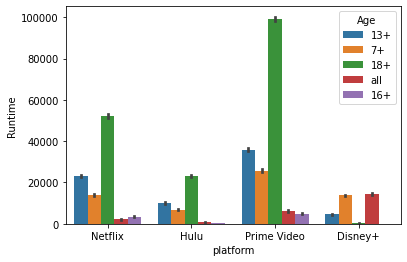

In [59]:
ax = sns.barplot(x="platform", y="Runtime",hue="Age", estimator=sum, data=ds2)